In [1]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
from keras import layers

2024-08-14 10:24:56.144487: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-14 10:24:56.178817: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-14 10:24:56.688939: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#Coletando dados 

df = pd.read_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/RJ_Reconstrucao_Sciaenidae_2024_08_06.xlsx')
df_Miraguaia_art = pd.DataFrame(df[['Ano','Miraguaia_art']])

dados = df_Miraguaia_art.dropna()
anos_com_dados = dados["Ano"].values
anos_para_prever = np.array([1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1990,1991,1992,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2009,2010,2011,2012,2016])
todos_anos = np.concatenate((anos_para_prever, anos_com_dados))
todos_anos.sort()

pesca = dados['Miraguaia_art'].values
dados.head()

,Ano,Miraguaia_art
26,1976,45.0
27,1977,16.0
28,1978,1.0
29,1979,1.0
30,1980,19.0


In [3]:
#Normalização dos dados

ano_mean = np.mean(anos_com_dados)
ano_std = np.std(anos_com_dados)
anos_para_prever_norm = (anos_para_prever - ano_mean)/ano_std
anos_com_dados_norm = (anos_com_dados - ano_mean)/ano_std

pesca_mean = np.mean(pesca)
pesca_std = np.std(pesca)
pesca_norm = (pesca - pesca_mean)/pesca_std

In [31]:
#Fit do modelo e salvando seus pesos
model = keras.Sequential([layers.Dense(96,activation='leaky_relu',input_shape=(1,)),
                             layers.Dense(32,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(80,activation='leaky_relu'),
                             layers.Dense(96,activation='leaky_relu'),
                             layers.Dense(112,activation='leaky_relu'),
                             layers.Dense(1,activation='linear')])

opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='mse')


history = model.fit(anos_com_dados_norm,pesca_norm, epochs=43, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Miraguaia/pesos pesca art/.weights.h5', overwrite=True)

Epoch 1/43


/home/andre/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step - loss: 0.9888
Epoch 2/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.9551
Epoch 3/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.9265
Epoch 4/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8969
Epoch 5/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.8657
Epoch 6/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8333
Epoch 7/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.8029
Epoch 8/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7777
Epoch 9/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7630
Epoch 10/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7622
Epoch 11/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7729
Epoch 12/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7821
Epoch 13/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7806
Epoch 14/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.7709
Epoch 15/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.7590
Epoch 16/43
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms

In [9]:
#Pegando os pesos salvos
model.load_weights('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Miraguaia/pesos pesca art/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Previsões dos dados ausentes: [[  4.8322983]
 [  6.645397 ]
 [  8.489422 ]
 [ 10.357689 ]
 [ 12.277161 ]
 [ 14.211353 ]
 [ 16.145527 ]
 [ 18.079708 ]
 [ 20.013916 ]
 [ 21.948093 ]
 [ 23.8821   ]
 [ 25.813725 ]
 [ 27.789541 ]
 [ 29.769062 ]
 [ 31.767395 ]
 [ 33.75549  ]
 [ 35.771713 ]
 [ 37.801823 ]
 [ 39.84131  ]
 [ 41.95821  ]
 [ 44.06714  ]
 [ 46.216934 ]
 [ 48.434696 ]
 [ 50.71819  ]
 [ 53.057533 ]
 [ 55.453102 ]
 [111.928    ]
 [ 95.68148  ]
 [ 78.62276  ]
 [ 44.90203  ]
 [ 41.620865 ]
 [ 38.824707 ]
 [ 36.606785 ]
 [ 34.338264 ]
 [ 32.085026 ]
 [ 30.069435 ]
 [ 28.231375 ]
 [ 26.551796 ]
 [ 24.847298 ]
 [ 23.25914  ]
 [ 21.731712 ]
 [ 18.546684 ]
 [ 16.889824 ]
 [ 15.240673 ]
 [ 13.588947 ]
 [  6.8121147]]


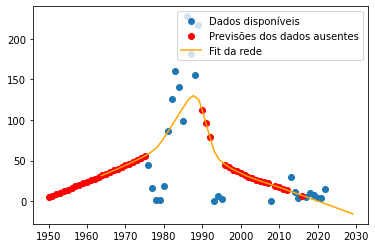

In [32]:
#Previsões
prev_disponiveis = model.predict(anos_com_dados_norm)*pesca_std + pesca_mean
prev_ausentes = model.predict(anos_para_prever_norm)*pesca_std + pesca_mean

#Colocando valores negativos para 0
for i in range(len(prev_ausentes)):
    if prev_ausentes[i]<0:
        prev_ausentes[i]=0

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(anos_com_dados,pesca,label='Dados disponíveis')
f1.scatter(anos_para_prever,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Plot do fit da rede
p = np.linspace(-2,2,50)
y = model.predict(p)*pesca_std + pesca_mean
f1.plot(p*ano_std + ano_mean,y,color='orange',label='Fit da rede')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()

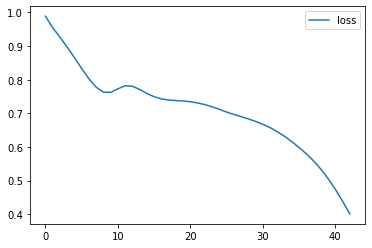

In [33]:
loss = history.history['loss']
plt.plot(loss,label='loss')
plt.legend()
plt.show()

In [34]:
#Planilha com os dados preenchidos

df_previsoes = pd.DataFrame({'Ano':anos_para_prever, 'Miraguaia_art':prev_ausentes.flatten()})

df_preenchido = pd.concat((dados,df_previsoes)).sort_values('Ano')

df_preenchido.to_excel('/home/andre/Área de Trabalho/Reconstrução da Estatística Pesqueira BR/Rio de Janeiro/Peixes/Sciaenidae/Miraguaia/Interpolações e Extrapolações Miraguaia_art.xlsx')

df_preenchido

,Ano,Miraguaia_art
0,1950,4.832298
1,1951,6.645397
2,1952,8.489422
3,1953,10.357689
4,1954,12.277161
...,...,...
68,2018,9.349882
69,2019,7.815530
70,2020,4.266400
71,2021,3.827238
